In [1]:

from haystack.document_stores.in_memory import InMemoryDocumentStore

document_store = InMemoryDocumentStore()

d:\a27_YEARS_OLD\RAG\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
from datasets import load_dataset
from haystack import Document

In [3]:
dataset=load_dataset("bilgeyucel/seven-wonders", split="train")

d:\a27_YEARS_OLD\RAG\venv\Lib\site-packages\huggingface_hub\file_download.py:140: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\lenovo\.cache\huggingface\hub\datasets--bilgeyucel--seven-wonders. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
Generating train split: 100%|██████████| 151/151 [00:00<00:00, 5037.34 examples/s]


In [4]:
dataset

Dataset({
    features: ['id', 'content', 'content_type', 'meta', 'id_hash_keys', 'score', 'embedding'],
    num_rows: 151
})

In [5]:
for doc in dataset:
  print(doc['content'])

The Colossus of Rhodes (Ancient Greek: ὁ Κολοσσὸς Ῥόδιος, romanized: ho Kolossòs Rhódios Greek: Κολοσσός της Ρόδου, romanized: Kolossós tes Rhódou)[a] was a statue of the Greek sun-god Helios, erected in the city of Rhodes, on the Greek island of the same name, by Chares of Lindos in 280 BC. One of the Seven Wonders of the Ancient World, it was constructed to celebrate the successful defence of Rhodes city against an attack by Demetrius Poliorcetes, who had besieged it for a year with a large army and navy.
According to most contemporary descriptions, the Colossus stood approximately 70 cubits, or 33 metres (108 feet) high – approximately the height of the modern Statue of Liberty from feet to crown – making it the tallest statue in the ancient world.[2] It collapsed during the earthquake of 226 BC, although parts of it were preserved. In accordance with a certain oracle, the Rhodians did not build it again.[3] John Malalas wrote that Hadrian in his reign re-erected the Colossus,[4] bu

In [7]:
# converted to doccument format
docs = [Document(content=doc["content"], meta=doc["meta"]) for doc in dataset]

In [8]:
docs

[Document(id=75fd8474f2c88337f7e0dad69eba0f24ba293cb06693fb746ec403df01a1c0c5, content: 'The Colossus of Rhodes (Ancient Greek: ὁ Κολοσσὸς Ῥόδιος, romanized: ho Kolossòs Rhódios Greek: Κολο...', meta: {'url': 'https://en.wikipedia.org/wiki/Colossus_of_Rhodes', '_split_id': 0}),
 Document(id=5e4115a663f0afb5f51c3aba9d04daf6f4fae39031cc55e553e31d7be7f1d734, content: '[6]
 In 653, an Arab force under Muslim general Muawiyah I conquered Rhodes, and according to the Chr...', meta: {'url': 'https://en.wikipedia.org/wiki/Colossus_of_Rhodes', '_split_id': 1}),
 Document(id=c674d039894fc1fdcfef9d3801ae976919c7fbe6b81a189a8ca630cd4e1d7961, content: 'Construction[edit]
 Timeline and map of the Seven Wonders of the Ancient World, including the Colossu...', meta: {'url': 'https://en.wikipedia.org/wiki/Colossus_of_Rhodes', '_split_id': 2}),
 Document(id=6554927b94b6bdbb39d6276775c18233900dbdef5e47b4222130c7b861be8fba, content: 'Philo of Byzantium wrote in De septem mundi miraculis that Chares create

embed to doccument

In [6]:
from haystack.components.embedders import SentenceTransformersDocumentEmbedder

doc_embedder = SentenceTransformersDocumentEmbedder(model="sentence-transformers/all-MiniLM-L6-v2")
doc_embedder.warm_up()

ou're passing the following parameter to the SentenceTransformersDocumentEmbedder constructor:
model="sentence-transformers/all-MiniLM-L6-v2": Specifies the pre-trained Sentence Transformers model to use for embedding documents.

In [11]:
doc_embedder

Inputs:
  - documents: List[Document]
Outputs:
  - documents: List[Document]

In [9]:
docs_with_embeddings = doc_embedder.run(docs)

Batches: 100%|██████████| 5/5 [00:10<00:00,  2.00s/it]


In [10]:
docs_with_embeddings

{'documents': [Document(id=75fd8474f2c88337f7e0dad69eba0f24ba293cb06693fb746ec403df01a1c0c5, content: 'The Colossus of Rhodes (Ancient Greek: ὁ Κολοσσὸς Ῥόδιος, romanized: ho Kolossòs Rhódios Greek: Κολο...', meta: {'url': 'https://en.wikipedia.org/wiki/Colossus_of_Rhodes', '_split_id': 0}, embedding: vector of size 384),
  Document(id=5e4115a663f0afb5f51c3aba9d04daf6f4fae39031cc55e553e31d7be7f1d734, content: '[6]
  In 653, an Arab force under Muslim general Muawiyah I conquered Rhodes, and according to the Chr...', meta: {'url': 'https://en.wikipedia.org/wiki/Colossus_of_Rhodes', '_split_id': 1}, embedding: vector of size 384),
  Document(id=c674d039894fc1fdcfef9d3801ae976919c7fbe6b81a189a8ca630cd4e1d7961, content: 'Construction[edit]
  Timeline and map of the Seven Wonders of the Ancient World, including the Colossu...', meta: {'url': 'https://en.wikipedia.org/wiki/Colossus_of_Rhodes', '_split_id': 2}, embedding: vector of size 384),
  Document(id=6554927b94b6bdbb39d6276775c18233900d

In [12]:

document_store.write_documents(docs_with_embeddings["documents"])

151

embed document to vector

In [13]:

from haystack.components.embedders import SentenceTransformersTextEmbedder
text_embedder = SentenceTransformersTextEmbedder(model="sentence-transformers/all-MiniLM-L6-v2")

In [14]:
text_embedder

Inputs:
  - text: str
Outputs:
  - embedding: List[float]

In [15]:

from haystack.components.retrievers.in_memory import InMemoryEmbeddingRetriever

retriever = InMemoryEmbeddingRetriever(document_store)
     

In [16]:
retriever

Inputs:
  - query_embedding: List[float]
  - filters: Optional[Dict[str, Any]]
  - top_k: Optional[int]
  - scale_score: Optional[bool]
  - return_embedding: Optional[bool]
Outputs:
  - documents: List[Document]

In [17]:
from haystack.components.builders import PromptBuilder

template = """
Given the following information, answer the question.

Context:
{% for document in documents %}
    {{ document.content }}
{% endfor %}

Question: {{question}}
Answer:
"""

prompt_builder = PromptBuilder(template=template)

In [18]:
prompt_builder

Inputs:
  - question: Any
  - documents: Any
  - template: Optional[str]
  - template_variables: Optional[Dict[str, Any]]
Outputs:
  - prompt: str

In [20]:

import os
from getpass import getpass
from haystack_integrations.components.generators.google_ai import GoogleAIGeminiGenerator

In [22]:
from dotenv import load_dotenv
import os
load_dotenv()
# genai.configure(api_key=os.getenv("GEMINI_API_KEY"))

os.environ["GOOGLE_API_KEY"] = os.getenv("GEMINI_API_KEY")

In [23]:
gemini = GoogleAIGeminiGenerator(model="gemini-pro")

In [26]:
gemini

Inputs:
  - parts: Union[str, ByteStream, Part]
  - streaming_callback: Optional[Callable[]]
Outputs:
  - replies: List[str]

In [25]:

from haystack import Pipeline

basic_rag_pipeline = Pipeline()

In [27]:
basic_rag_pipeline # like chain in langchain

🚅 Components
🛤️ Connections

In [28]:
# ilke create a keras network model
# Add components to your pipeline
basic_rag_pipeline.add_component("text_embedder", text_embedder)
basic_rag_pipeline.add_component("retriever", retriever)
basic_rag_pipeline.add_component("prompt_builder", prompt_builder)
basic_rag_pipeline.add_component("llm", gemini)

In [29]:
basic_rag_pipeline

🚅 Components
  - text_embedder: SentenceTransformersTextEmbedder
  - retriever: InMemoryEmbeddingRetriever
  - prompt_builder: PromptBuilder
  - llm: GoogleAIGeminiGenerator
🛤️ Connections

In [30]:
# Now, connect the components to each other # like sklearn pipeline
basic_rag_pipeline.connect("text_embedder.embedding", "retriever.query_embedding")
basic_rag_pipeline.connect("retriever", "prompt_builder.documents")
basic_rag_pipeline.connect("prompt_builder", "llm")


🚅 Components
  - text_embedder: SentenceTransformersTextEmbedder
  - retriever: InMemoryEmbeddingRetriever
  - prompt_builder: PromptBuilder
  - llm: GoogleAIGeminiGenerator
🛤️ Connections
  - text_embedder.embedding -> retriever.query_embedding (List[float])
  - retriever.documents -> prompt_builder.documents (List[Document])
  - prompt_builder.prompt -> llm.parts (str)

In [ ]:
# ou're connecting the components of a basic RAG (Retrieval-Augmented Generator) pipeline.
# Pipeline Components:
# The basic RAG pipeline consists of the following components:
# Text Embedder: Embeds input text into dense vectors.
# Retriever: Retrieves relevant documents based on the input embedding.
# Prompt Builder: Builds a prompt using the retrieved documents.
# LLM (Large Language Model): Generates text based on the prompt.
# Connections:
# You're establishing the following connections between the components:
# Text Embedder → Retriever: The output embedding from the text embedder is used as the query embedding for the retriever.
# Retriever → Prompt Builder: The retrieved documents from the retriever are passed to the prompt builder.
# Prompt Builder → LLM: The generated prompt from the prompt builder is used as input to the LLM.

In [31]:

question = "What is query planning ?"

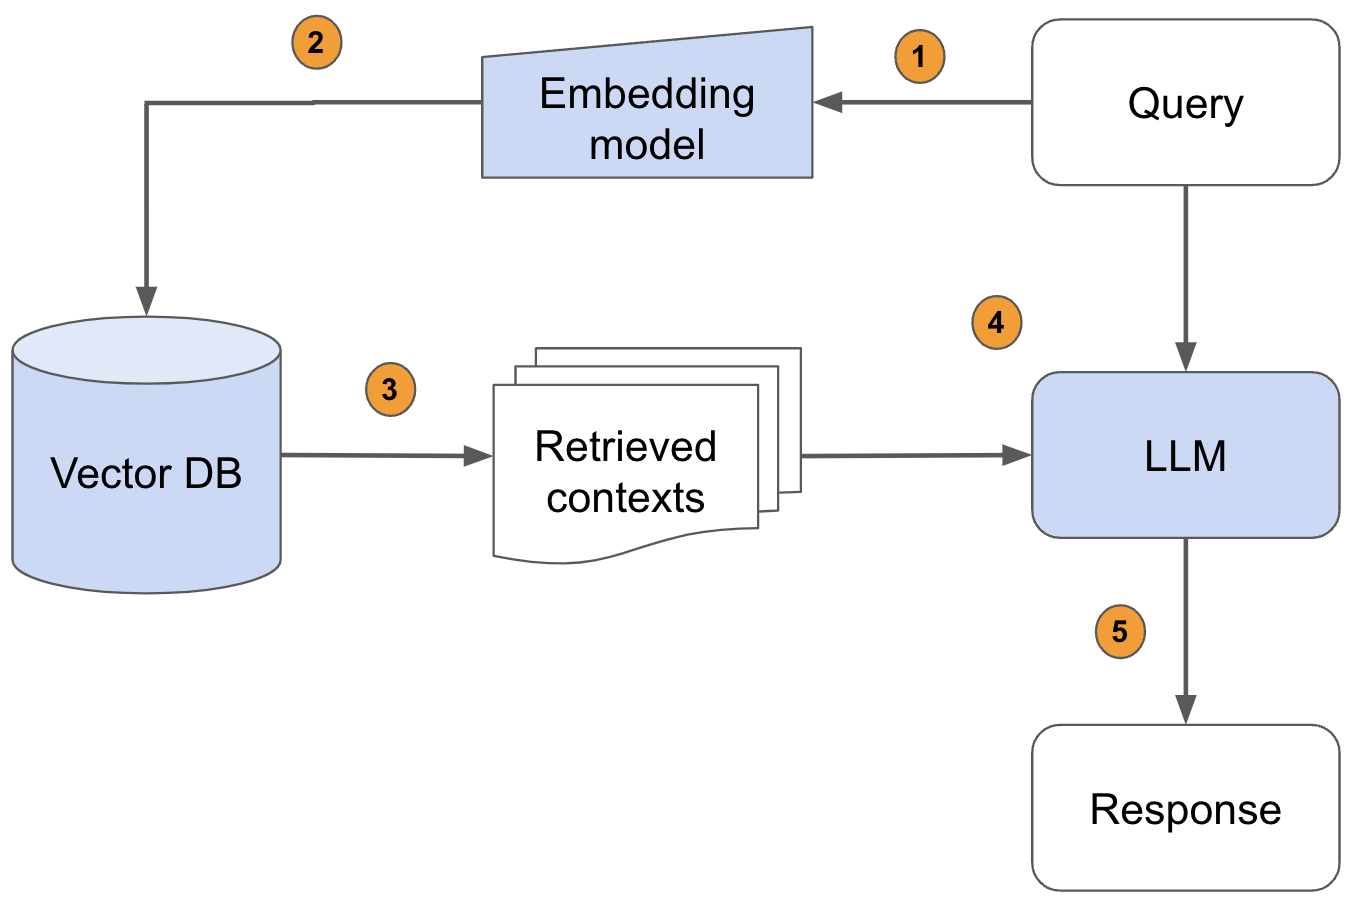

In [32]:
# query is give to both retiver(text_embedder) which perform semantic search from vector store and and llm (prompt builder) 
# which refine the annswer from search results
response = basic_rag_pipeline.run({"text_embedder": {"text": question}, "prompt_builder": {"question": question}})

Batches: 100%|██████████| 1/1 [00:00<00:00,  1.26it/s]


In [ ]:
# Pipeline Input:
# The input to the pipeline consists of two components:
# Text Embedder: The input text is set to the question variable.
# Prompt Builder: The question variable is also passed to the prompt builder.
# Pipeline Execution:
# When you run the pipeline, it will execute the following steps:
# Text Embedder: Embeds the input question into a dense vector.
# Retriever: Retrieves relevant documents based on the embedded vector.
# Prompt Builder: Builds a prompt using the retrieved documents and the original question.
# LLM: Generates a response based on the prompt.

In [33]:
response

{'llm': {'replies': ['The provided text does not contain any information about query planning, so I cannot answer this question from the provided context.']}}

In [34]:
response["llm"]["replies"][0]

'The provided text does not contain any information about query planning, so I cannot answer this question from the provided context.'